In [1]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from config import user, password, host, port, database
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
db_url = f"postgresql://{user}:{password}@{host}:{port}/{database}"
engine = create_engine(db_url)


In [3]:
query = "SELECT * FROM iris_flowers"
iris_data = pd.read_sql(query, engine)

In [4]:
df = pd.DataFrame(iris_data)
df.head()

,id,sepallengthcm,sepalwidthcm,petallengthcm,petalwidthcm,species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# github_csv_url = "https://github.com/Talamanj08/Project-4/raw/main/Iris_flower_dataset.csv"
# df = pd.read_csv(github_csv_url)
# df.head(50)


In [5]:
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [6]:
df = df.rename(columns={
    'species':'Species',
    'sepallengthcm': 'SepalLengthCm',
    'sepalwidthcm': 'SepalWidthCm',
    'petallengthcm': 'PetalLengthCm',
    'petalwidthcm': 'PetalWidthCm'
})
df.head()

,id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
average_values = df.groupby('Species')[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].mean()

average_values

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


In [8]:
X = df.drop(['Species', 'id'], axis=1)
y = df["Species"]

X.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [41]:
# Create Logistic Regression Model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs', random_state=1)
# Train the data
classifier.fit(X_train, y_train)

LogisticRegression(random_state=1)

In [42]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.9555555555555556
Testing Data Score: 1.0


In [43]:
# Predict outcomes for test data set
predictions = classifier.predict(X_test)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})


,Prediction,Actual
73,Iris-versicolor,Iris-versicolor
18,Iris-setosa,Iris-setosa
118,Iris-virginica,Iris-virginica
78,Iris-versicolor,Iris-versicolor
76,Iris-versicolor,Iris-versicolor
31,Iris-setosa,Iris-setosa
64,Iris-versicolor,Iris-versicolor
141,Iris-virginica,Iris-virginica
68,Iris-versicolor,Iris-versicolor
82,Iris-versicolor,Iris-versicolor


In [44]:
from sklearn.metrics import accuracy_score
# Display the accuracy score for the test dataset.
accuracy_score(y_test, predictions)

1.0

In [45]:
# Create Random Forest Model
from sklearn.ensemble import RandomForestClassifier

rf_model= RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [46]:
# Show accuracy and Classification report for Random Forest 
from sklearn.metrics import accuracy_score, classification_report

y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)

Accuracy: 0.9833333333333333
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        23
Iris-versicolor       0.95      1.00      0.97        19
 Iris-virginica       1.00      0.94      0.97        18

       accuracy                           0.98        60
      macro avg       0.98      0.98      0.98        60
   weighted avg       0.98      0.98      0.98        60



In [47]:
from sklearn.metrics import confusion_matrix
c_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", c_matrix)

Confusion Matrix:
 [[23  0  0]
 [ 0 19  0]
 [ 0  1 17]]


In [48]:
#example of web interface inputs
sepal_length = 5.9
sepal_width = 3.0
petal_length = 5.1
petal_width = 1.8

input_data = [[sepal_length, sepal_width, petal_length, petal_width]]
predicted_species = rf_model.predict(input_data)
print("Predicted Species:", predicted_species[0])

Predicted Species: Iris-virginica


C:\Users\Owner\anaconda3\envs\dev\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


<Axes: title={'center': 'Features Importances'}, ylabel='1'>

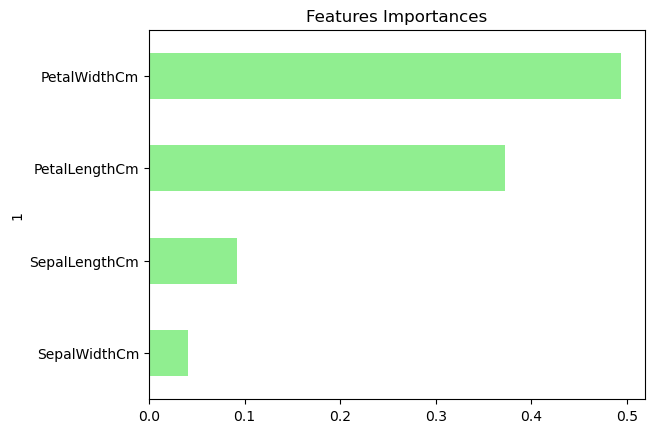

In [49]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

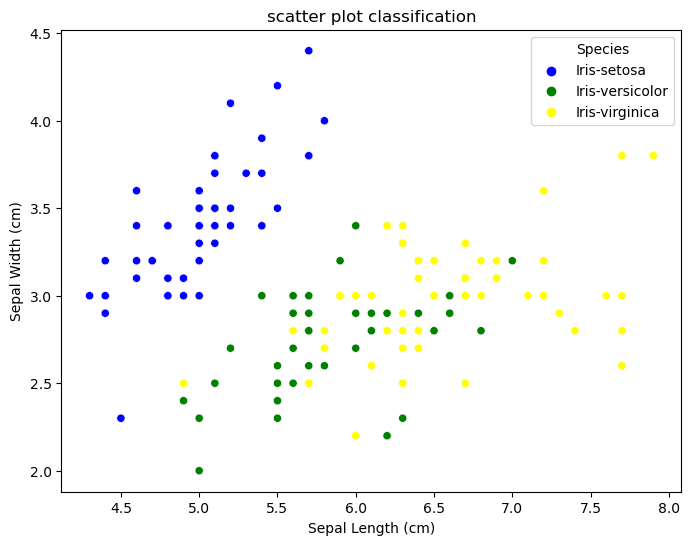

In [50]:
# SHOW MOST IMPORTANT FEATURES ON SCATTER BY CLASSIFICATION
# Set a color palette for species
species_colors = {'Iris-setosa': 'blue', 'Iris-versicolor': 'green', 'Iris-virginica': 'yellow'}

# Create a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', data=df, hue='Species', palette=species_colors)

# Set plot title and labels
plt.title('scatter plot classification')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')

# Display the legend
plt.legend(title='Species')

# Show the plot
plt.show()


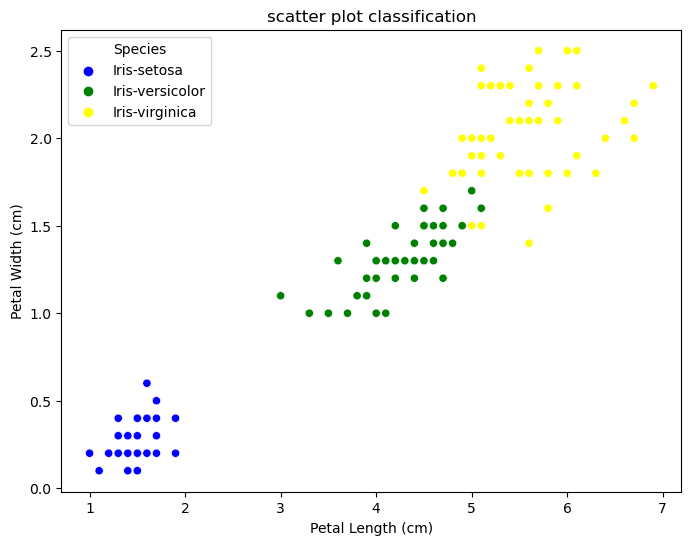

In [51]:
# Set a color palette for species
species_colors = {'Iris-setosa': 'blue', 'Iris-versicolor': 'green', 'Iris-virginica': 'yellow'}

# Create a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', data=df, hue='Species', palette=species_colors)

# Set plot title and labels
plt.title('scatter plot classification')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')

# Display the legend
plt.legend(title='Species')

# Show the plot
plt.show()

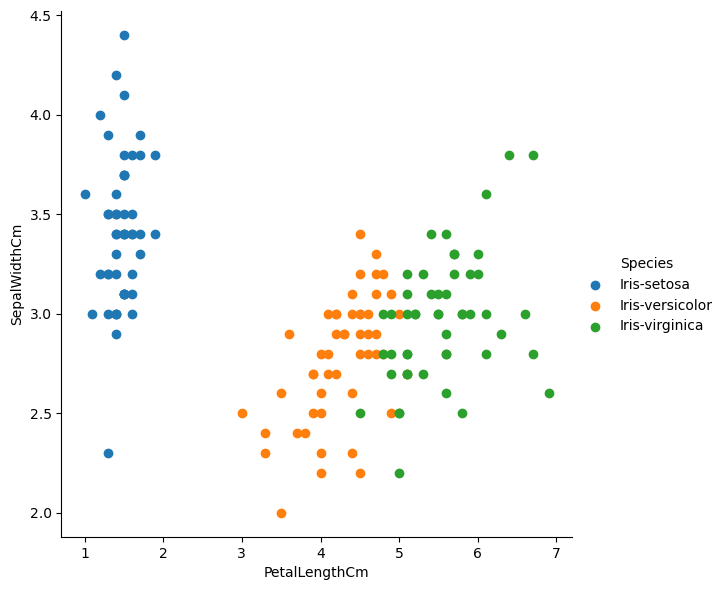

In [39]:
sns.FacetGrid(df, hue="Species", height=6).map(plt.scatter,'PetalLengthCm', 'SepalWidthCm').add_legend()

In [ ]:
pip install joblib

In [ ]:
import joblib
joblib.dump(model,'model.joblib')
